# Load Cleaned Data

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import geopandas as gpd
import numpy as np
import seaborn as sns

In [34]:
census_tract_daily = pd.read_csv("data/census_tract_daily_data.csv")
census_tract_hourly = pd.read_csv("data/census_tract_hourly_data.csv")
hexagon7_daily = pd.read_csv("data/hexagon7_daily_data.csv")
hexagon7_hourly = pd.read_csv("data/hexagon7_hourly_data.csv")

census_tract_daily['Date'] = pd.to_datetime(census_tract_daily['Date'])
census_tract_hourly['Hour'] = pd.to_datetime(census_tract_hourly['Hour'])
hexagon7_daily['Date'] = pd.to_datetime(hexagon7_daily['Date'])
hexagon7_hourly['Hour'] = pd.to_datetime(hexagon7_hourly['Hour'])

# Taxi Demand

In [42]:
# Extracting the components
census_tract_hourly['Date'] = census_tract_hourly['Hour'].dt.date
census_tract_hourly['Hour_Of_Day'] = census_tract_hourly['Hour'].dt.hour
census_tract_hourly['Weekday'] = census_tract_hourly['Hour'].dt.weekday  # Monday=0, Sunday=6
census_tract_hourly['Month'] = census_tract_hourly['Hour'].dt.month

## Taxi Demand by Day

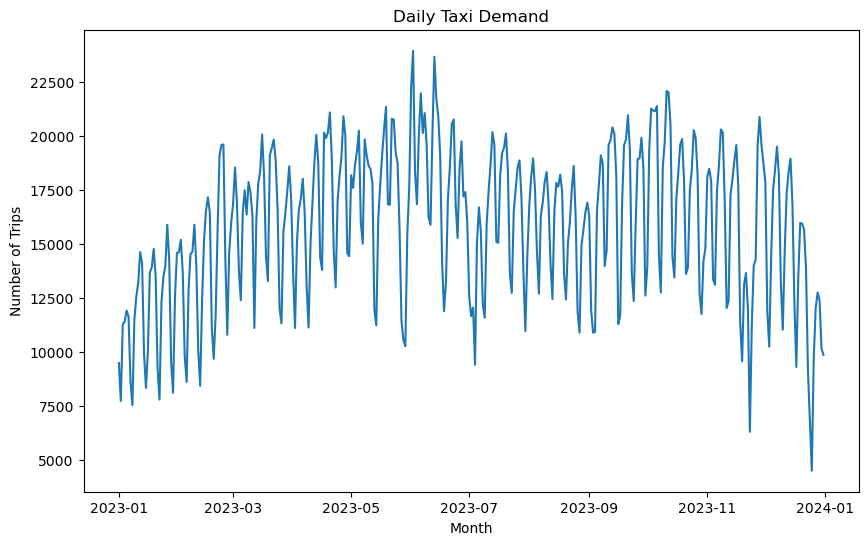

In [43]:
# Group by 'Date' and sum the 'Number of Trips'
daily_traffic = census_tract_hourly.groupby('Date')['Number of Trips'].sum().reset_index()

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Number of Trips', data=daily_traffic)

# Adding titles and labels
plt.title('Daily Taxi Demand')
plt.xlabel('Month')
plt.ylabel('Number of Trips')

# Display the plot
plt.show()

## Taxi Demand by Hour

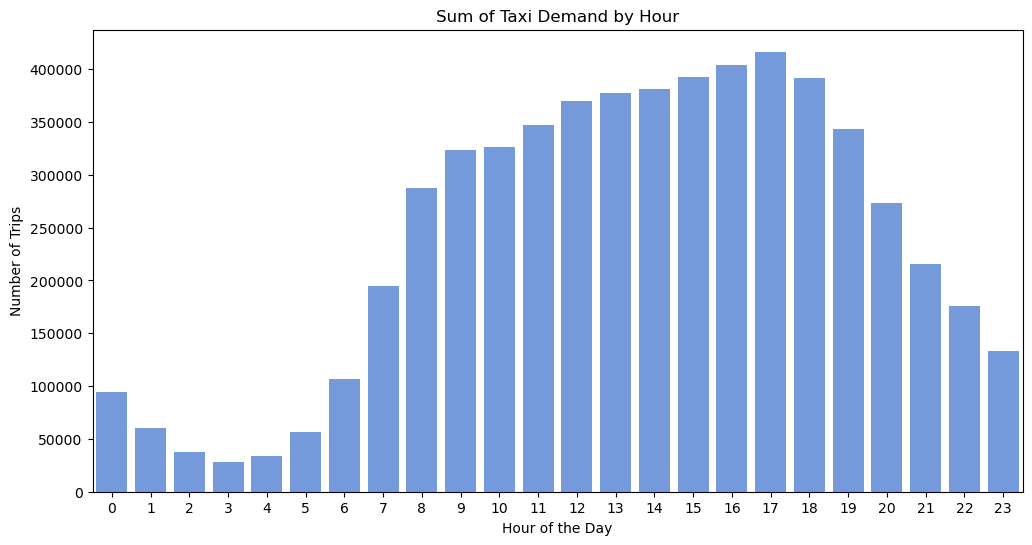

In [53]:
# Group by 'Hour_of_Day' and sum the 'Number of Trips'
hourly_traffic = census_tract_hourly.groupby('Hour_Of_Day')['Number of Trips'].sum().reset_index()

# Plot the hourly traffic volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Hour_Of_Day', y='Number of Trips', data=hourly_traffic, color="cornflowerblue")
# Add title and labels
plt.title('Sum of Taxi Demand by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')

# Show the plot
plt.show()

## Taxi Demand by Weekday

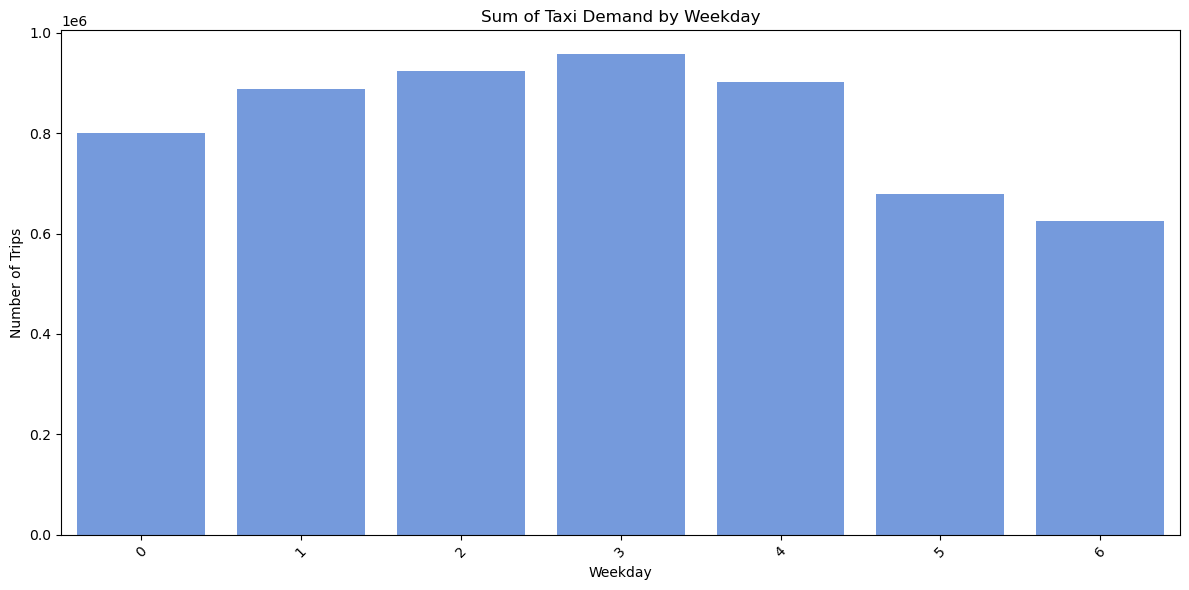

In [52]:
# Group by 'Weekday and sum the 'Number of Trips'
weekday_traffic = census_tract_hourly.groupby('Weekday')['Number of Trips'].sum().reset_index()

# Plot the weekly traffic volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Weekday', y='Number of Trips', data=weekday_traffic, color="cornflowerblue")
plt.title('Sum of Taxi Demand by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Taxi Demand by Month

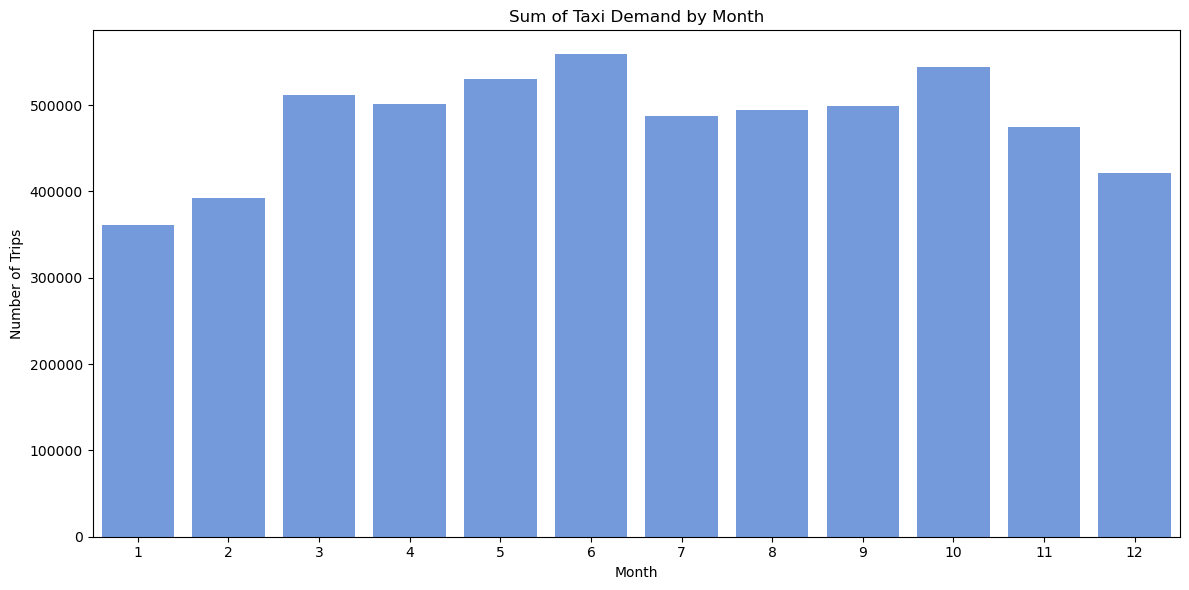

In [51]:
# Group by 'Month' and sum the 'Number of Trips'
monthly_traffic = census_tract_hourly.groupby('Month')['Number of Trips'].sum().reset_index()

# Plot the monthly traffic volume
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Number of Trips', data=monthly_traffic, color="cornflowerblue")
plt.title('Sum of Taxi Demand by Month')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.tight_layout()
plt.show()

## Taxi Demand by Census Tract

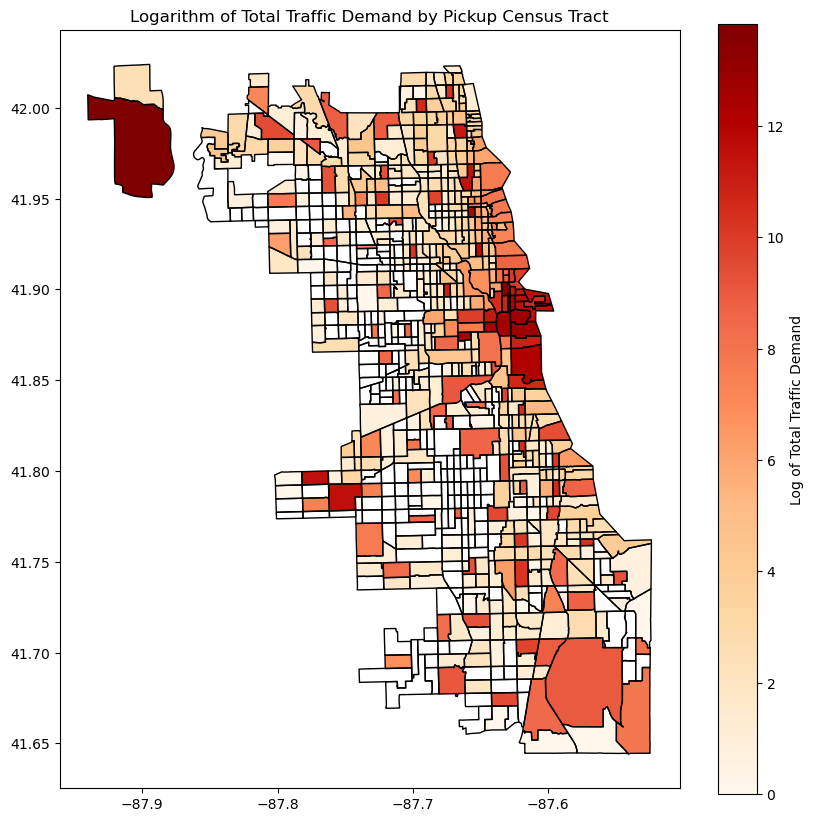

In [83]:
census_tract_shapefile = gpd.read_file('Boundaries - Census Tracts - 2010/geo_export_43205675-be18-433e-beb4-7eb585400a4e.shp')


# Calculate the sum of trips per geometry
census_trips = census_tract_daily.groupby(['geometry'])['Number of Trips'].sum().reset_index()
census_trips['Log Number of Trips'] = np.log(census_trips['Number of Trips'])

# Convert the DataFrame to a GeoDataFrame
census_trips = gpd.GeoDataFrame(census_trips, geometry=gpd.GeoSeries.from_wkt(census_trips['geometry']))

# Plot the data
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()
census_trips.plot(ax=ax, column='Log Number of Trips', cmap='OrRd', legend=True,
                  legend_kwds={'label': "Log of Total Traffic Demand",
                               'orientation': "vertical"})
census_tract_shapefile.plot(ax=ax, edgecolor='black', facecolor='none')
plt.title('Logarithm of Total Traffic Demand by Pickup Census Tract')
plt.show()

## Taxi Demand by Hexagon

In [85]:
hexagon7_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39905 entries, 0 to 39904
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             39905 non-null  datetime64[ns]
 1   hex_id_7         39905 non-null  object        
 2   Trip Seconds     39905 non-null  float64       
 3   Trip Miles       39905 non-null  float64       
 4   Fare             39905 non-null  float64       
 5   Tips             39905 non-null  float64       
 6   Tolls            39905 non-null  float64       
 7   Extras           39905 non-null  float64       
 8   Trip Total       39905 non-null  float64       
 9   Number of Trips  39905 non-null  float64       
 10  hex_geometry_7   39905 non-null  object        
 11  bank             39905 non-null  float64       
 12  bar              39905 non-null  float64       
 13  biergarten       39905 non-null  float64       
 14  cafe             39905 non-null  float

/Users/hsienpanghsieh/miniconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


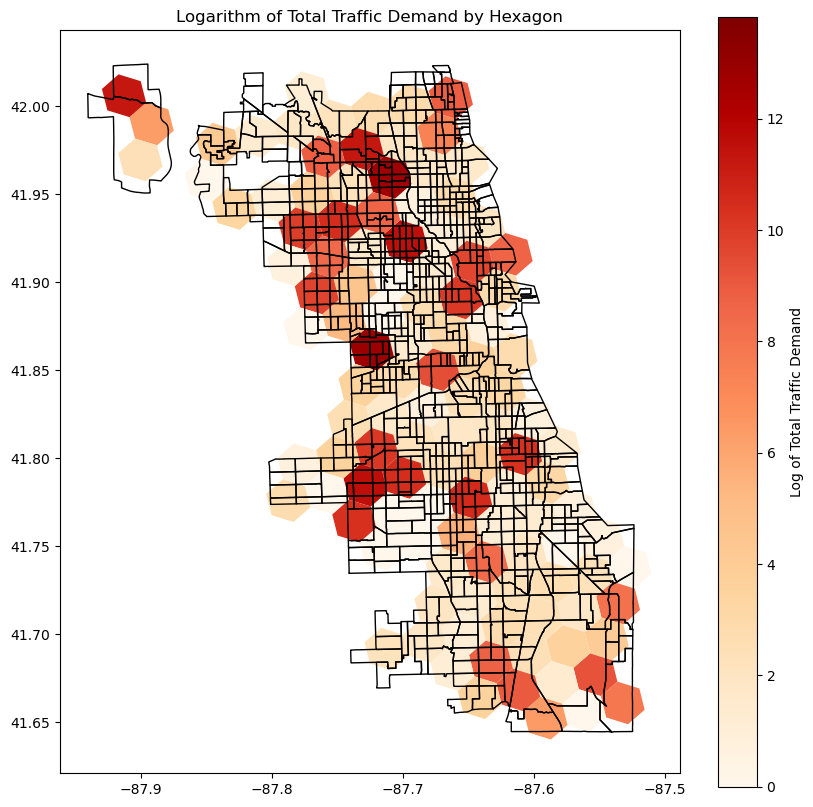

In [94]:
# Calculate the sum of trips per geometry
hexagon_trips = hexagon7_daily.groupby(['hex_geometry_7'])['Number of Trips'].sum().reset_index()
hexagon_trips['Log Number of Trips'] = np.log(hexagon_trips['Number of Trips'])

# Convert the DataFrame to a GeoDataFrame
hexagon_trips = gpd.GeoDataFrame(census_trips, geometry=gpd.GeoSeries.from_wkt(hexagon_trips['hex_geometry_7']))

# Plot the data
plt.rcParams['figure.figsize'] = [10, 10]
fig, ax = plt.subplots()

hexagon_trips.plot(ax=ax, column='Log Number of Trips', cmap='OrRd', legend=True,
                  legend_kwds={'label': "Log of Total Traffic Demand",
                               'orientation': "vertical"})
census_tract_shapefile.plot(ax=ax, edgecolor='0', facecolor='none')

plt.title('Logarithm of Total Traffic Demand by Hexagon')
plt.show()